<a href="https://colab.research.google.com/github/nyasharuocha/HOMEWORK/blob/master/imageclassificationdeployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NYASHA RUOCHA R182569X
TZEGRIDAH DENDERE R183571T


[LINK TO APP](https://share.streamlit.io/nyasharuocha/homework/app.py)

[LINK TO VIDEO](https://drive.google.com/file/d/1_cECz7fA51-9I8WHsr8qBWyuu9TLGlIc/view?usp=sharing
)

In [ ]:
try :
  import tensorflow as tf
  import matplotlib.pyplot as plt
  import numpy as np
  print('Library Loaded .........')
except:
    print('One or More Library was not Found ! ')

2021-07-11 07:34:27.244504: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Library Loaded .........


In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train=x_train/255.0
x_train.shape

tcmalloc: large alloc 1228800000 bytes == 0x56409072c000 @  0x7f3c9ca751e7 0x7f3c93eab46e 0x7f3c93efbc7b 0x7f3c93efbd18 0x7f3c93fb7d79 0x7f3c93fbae4c 0x7f3c940d9e7f 0x7f3c940dffb5 0x7f3c940e1e3d 0x7f3c940e3516 0x56407c515f30 0x56407c515b09 0x7f3c93fc24d8 0x56407c4f8303 0x56407c5fe646 0x56407c586785 0x56407c5834ae 0x56407c5831b3 0x56407c581660 0x56407c514b59 0x56407c514a50 0x56407c588453 0x56407c5834ae 0x56407c5163ea 0x56407c58460e 0x56407c5834ae 0x56407c5163ea 0x56407c58532a 0x56407c5837ad 0x56407c516c9f 0x56407c516ea1


(50000, 32, 32, 3)

In [ ]:
y_train[:5] 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

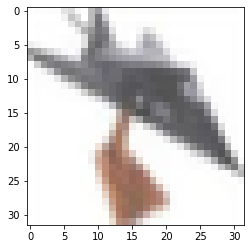

In [ ]:
plt.imshow(x_test[215])

In [ ]:
cifar10_model=tf.keras.models.Sequential()

2021-07-11 07:34:30.651951: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-11 07:34:30.665359: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-11 07:34:30.665399: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (af952164f124): /proc/driver/nvidia/version does not exist


In [ ]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [ ]:
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [ ]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [ ]:
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [ ]:
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [ ]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [ ]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [ ]:
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [ ]:
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [ ]:
cifar10_model.fit(x_train,y_train,epochs=15)

2021-07-11 07:34:31.454085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-11 07:34:31.455136: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2200190000 Hz


Epoch 1/15
1563/1563 [==============================] - 237s 151ms/step - loss: 1.4292 - sparse_categorical_accuracy: 0.4802
Epoch 2/15
1563/1563 [==============================] - 236s 151ms/step - loss: 1.0328 - sparse_categorical_accuracy: 0.6338
Epoch 3/15
1563/1563 [==============================] - 237s 152ms/step - loss: 0.8755 - sparse_categorical_accuracy: 0.6918
Epoch 4/15
1563/1563 [==============================] - 238s 152ms/step - loss: 0.7838 - sparse_categorical_accuracy: 0.7240
Epoch 5/15
1563/1563 [==============================] - 239s 153ms/step - loss: 0.7142 - sparse_categorical_accuracy: 0.7493
Epoch 6/15
1563/1563 [==============================] - 239s 153ms/step - loss: 0.6586 - sparse_categorical_accuracy: 0.7686
Epoch 7/15
1563/1563 [==============================] - 240s 154ms/step - loss: 0.6141 - sparse_categorical_accuracy: 0.7838
Epoch 8/15
1563/1563 [==============================] - 241s 154ms/step - loss: 0.5754 - sparse_categorical_accuracy: 0.7979


In [ ]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 11s 35ms/step - loss: 0.6824 - sparse_categorical_accuracy: 0.7814


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7814000248908997


In [ ]:
y_pred = cifar10_model.predict(x_test)
y_pred[:4]

array([[1.55822399e-05, 8.36020604e-07, 3.31747628e-06, 5.32400310e-01,
        1.15427952e-06, 4.63213831e-01, 4.32839990e-03, 1.97094450e-05,
        1.65302463e-05, 2.85730636e-07],
       [8.52472513e-05, 6.17509075e-02, 8.48197380e-12, 3.73136272e-10,
        2.94658959e-12, 3.14653338e-12, 5.39346095e-14, 4.61731636e-16,
        9.38136756e-01, 2.70843011e-05],
       [7.12432712e-02, 4.13503617e-01, 4.10042139e-06, 9.71885966e-05,
        3.85232539e-07, 3.80911706e-06, 2.49682262e-06, 4.46127046e-08,
        4.44467336e-01, 7.06777275e-02],
       [1.84746802e-01, 2.59536743e-01, 1.14726055e-04, 7.19262427e-03,
        4.51925735e-04, 3.59773221e-05, 7.16089780e-05, 4.73780347e-06,
        9.13245231e-02, 4.56520289e-01]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 9, 6]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
# save the model

cifar10_model.save("my_model.h5")

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok==4.1.1

In [ ]:

%%writefile app.py
import os
import cv2
import numpy as np 
from PIL import Image , ImageOps
import streamlit as st
from tensorflow.keras.models import load_model
import tensorflow as tf

class_name = ["airplane", "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]

# Create a function to load my saved model
@st.cache(allow_output_mutation=True)
def load_my_model():
    model = tf.keras.models.load_model("my_model.h5")
    return model

model = load_my_model()

# Create a title of web App
st.title("Image Classification with Cifar10 Dataset")
st.header("Please Upload images related to this things...")
st.text(class_name)

# create a file uploader and take a image as an jpg or png
file = st.file_uploader("Upload the image" , type=["jpg" , "png"])

# Create a function to take and image and predict the class
def import_and_predict(image_data , model):
    size = (32 ,32)
    image = ImageOps.fit(image_data , size , Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    return prediction

if st.button("Predict"):
    image = Image.open(file)
    st.image(image , use_column_width=True)
    predictions = import_and_predict(image , model)

    class_name = ["airplane", "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]

    string = "Image mostly same as :-" + class_name[np.argmax(predictions)]
    st.success(string)

Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
from pyngrok import ngrok

In [ ]:
url = ngrok.connect(port = '8501')

print(url)

http://043bc17a2646.ngrok.io
